<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/DotA_AllStar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/dota.csv")

In [7]:
warnings.filterwarnings("ignore")
print("warnings closed")

warnings closed


In [8]:
data.head()

,Name,Type,Alignment,Health,Mana,Damage,AttackSpeed,Range,Armor,MovementSpeed
0,Rexxar The Beastmaster,Strength,Sentinel,587,208,58,0.69,128,5.0,310
1,Bradwarden the Centaur Warchief,Strength,Sentinel,587,195,56,0.68,100,3.0,300
2,Raigor Stonehoof the Earthshaker,Strength,Sentinel,568,208,51,0.66,128,3.0,300
3,Purist Thunderwrath the Omniknight,Strength,Sentinel,530,221,56,1.44,100,4.0,300
4,Mangix the Pandaren Brewmaster,Strength,Sentinel,587,182,56,0.68,128,3.0,300


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           46 non-null     object 
 1   Type           46 non-null     object 
 2   Alignment      46 non-null     object 
 3   Health         46 non-null     int64  
 4   Mana           46 non-null     int64  
 5   Damage         46 non-null     int64  
 6   AttackSpeed    46 non-null     float64
 7   Range          46 non-null     int64  
 8   Armor          46 non-null     float64
 9   MovementSpeed  46 non-null     int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ KB


In [10]:
data["Alignment"].unique()

array(['Sentinel', 'Source'], dtype=object)

In [11]:
len(data["Alignment"].unique())

2

In [12]:
data.corr()

,Health,Mana,Damage,AttackSpeed,Range,Armor,MovementSpeed
Health,1.000000,-0.310333,0.532958,0.067909,-0.598668,0.166386,0.187766
Mana,-0.310333,1.000000,-0.258970,0.114922,0.493374,-0.311760,-0.235144
Damage,0.532958,-0.258970,1.000000,0.071481,-0.667786,0.483301,0.023189
AttackSpeed,0.067909,0.114922,0.071481,1.000000,0.013541,-0.009541,0.231668
Range,-0.598668,0.493374,-0.667786,0.013541,1.000000,-0.539832,-0.183549
Armor,0.166386,-0.311760,0.483301,-0.009541,-0.539832,1.000000,-0.020517
MovementSpeed,0.187766,-0.235144,0.023189,0.231668,-0.183549,-0.020517,1.000000


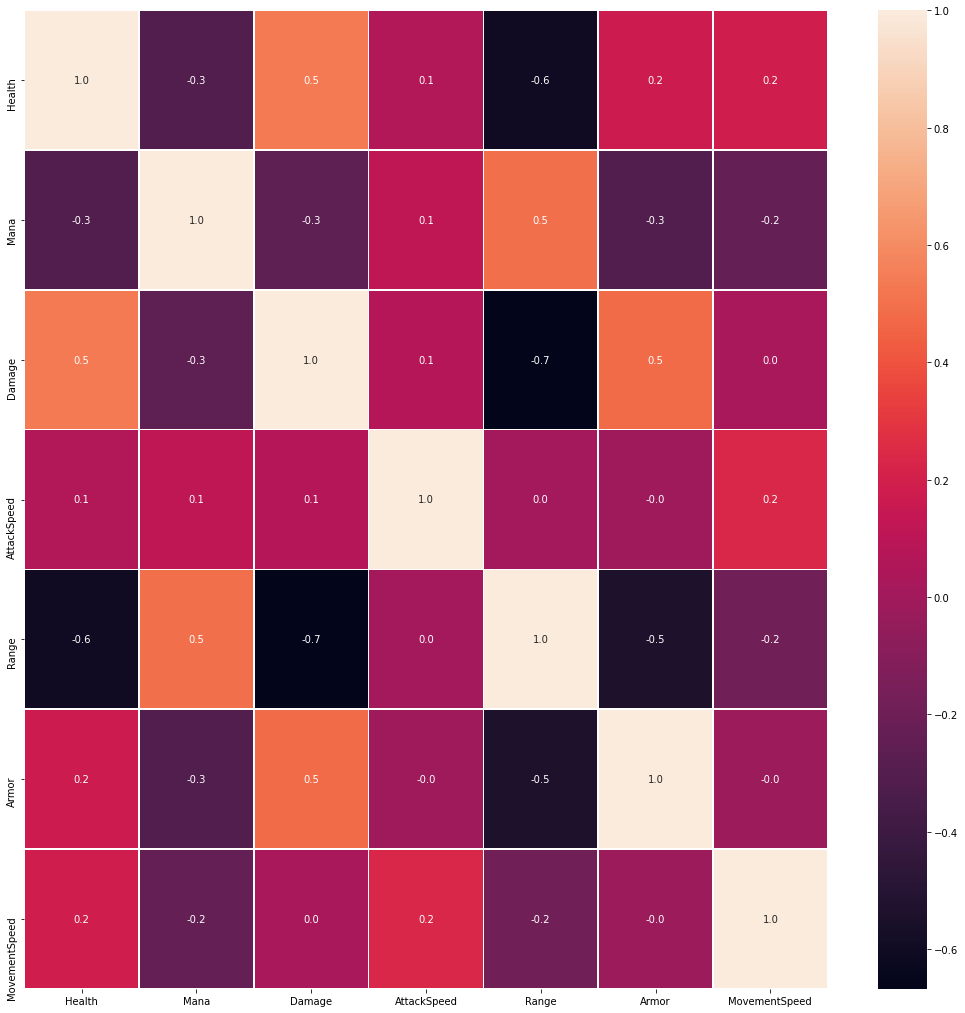

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [14]:
data.columns

Index(['Name', 'Type', 'Alignment', 'Health', 'Mana', 'Damage', 'AttackSpeed',
       'Range', 'Armor', 'MovementSpeed'],
      dtype='object')

In [15]:
list1 = data['Armor']
list2 = data['AttackSpeed']
z = zip(list1,list2)
print(z)
z_list = list(z)
print(z_list)

[(5.0, 0.69), (3.0, 0.68), (3.0, 0.66), (4.0, 1.44), (3.0, 0.68), (1.94, 0.71), (0.0, 0.67), (1.0, 0.65), (5.0, 0.7), (2.0, 0.75), (2.0, 1.5), (1.96, 0.67), (3.0, 0.72), (3.0, 0.72), (6.0, 0.71), (2.0, 0.73), (1.0, 0.68), (1.08, 0.71), (6.0, 0.71), (2.0, 0.72), (4.0, 0.72), (2.0, 0.71), (2.0, 0.7), (2.0, 0.72), (1.0, 0.68), (1.0, 0.68), (3.52, 1.7), (1.24, 0.58), (1.24, 1.7), (1.0, 0.67), (5.0, 0.66), (2.0, 0.71), (3.0, 0.66), (1.0, 0.68), (6.0, 0.69), (4.0, 0.69), (3.08, 1.7), (2.08, 0.58), (3.0, 0.69), (3.66, 1.7), (1.7, 0.96), (1.0, 1.7), (2.0, 0.71), (4.0, 0.69), (2.0, 0.69), (2.4, 1.7)]


In [16]:
un_zip = zip(*z_list)
un_list1,un_list2 = list(un_zip)
print(un_list1)
print(un_list2)
print(type(un_list2))

(5.0, 3.0, 3.0, 4.0, 3.0, 1.94, 0.0, 1.0, 5.0, 2.0, 2.0, 1.96, 3.0, 3.0, 6.0, 2.0, 1.0, 1.08, 6.0, 2.0, 4.0, 2.0, 2.0, 2.0, 1.0, 1.0, 3.52, 1.24, 1.24, 1.0, 5.0, 2.0, 3.0, 1.0, 6.0, 4.0, 3.08, 2.08, 3.0, 3.66, 1.7, 1.0, 2.0, 4.0, 2.0, 2.4)
(0.69, 0.68, 0.66, 1.44, 0.68, 0.71, 0.67, 0.65, 0.7, 0.75, 1.5, 0.67, 0.72, 0.72, 0.71, 0.73, 0.68, 0.71, 0.71, 0.72, 0.72, 0.71, 0.7, 0.72, 0.68, 0.68, 1.7, 0.58, 1.7, 0.67, 0.66, 0.71, 0.66, 0.68, 0.69, 0.69, 1.7, 0.58, 0.69, 1.7, 0.96, 1.7, 0.71, 0.69, 0.69, 1.7)
<class 'tuple'>


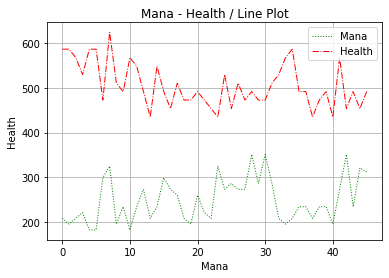

In [17]:
data.Mana.plot(kind = 'line', color = 'g',label = 'Mana',linewidth=1,alpha = 1,grid = True,linestyle = ':')
data.Health.plot(color = 'r',label = 'Health',linewidth=1, alpha = 1,grid = True,linestyle = '-.')
plt.legend(loc='upper right')
plt.xlabel('Mana')             
plt.ylabel('Health')
plt.title('Mana - Health / Line Plot')          
plt.show()

Text(0.5, 1.0, 'Damage - Range')

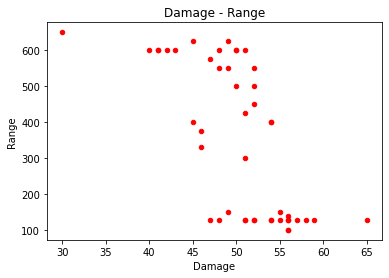

In [18]:
data.plot(kind='scatter', x='Damage', y='Range',alpha = 1,color = 'red')
plt.xlabel('Damage')    
plt.ylabel('Range')
plt.title('Damage - Range')

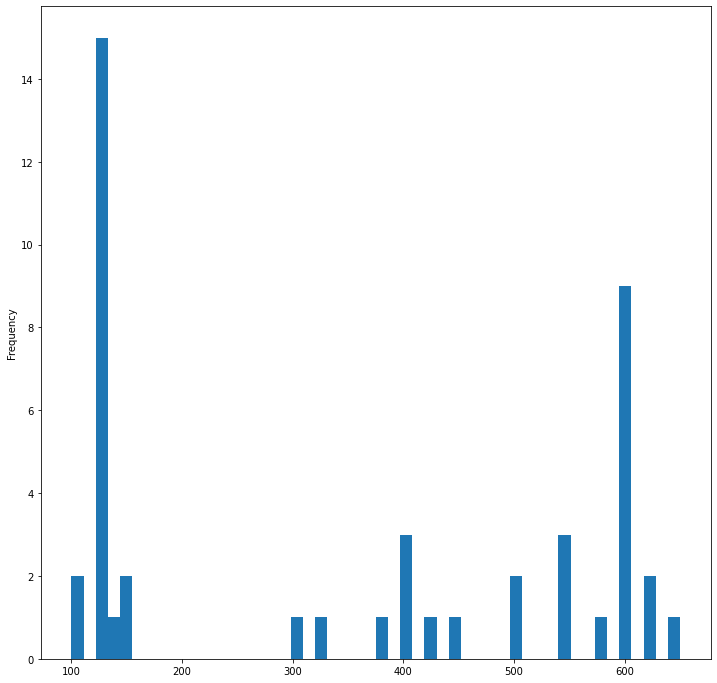

In [19]:
data.Range.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

In [20]:
x = data['MovementSpeed']<295
data[x]

,Name,Type,Alignment,Health,Mana,Damage,AttackSpeed,Range,Armor,MovementSpeed
8,Davion the Dragon Knight,Strength,Sentinel,511,195,48,0.70,128,5.00,290
12,Azwraith The Phantom Lancer,Agility,Sentinel,492,273,56,0.72,128,3.00,290
16,Rylai Crestfall The Crystal Maiden,Agility,Sentinel,454,273,41,0.68,600,1.00,280
28,Lina Inverse The Slayer,Intelligence,Sentinel,492,351,49,1.70,625,1.24,280
29,Squee Spleen and Spoon The Goblin Techies,Intelligence,Sentinel,473,286,30,0.67,650,1.00,270
31,Kael The Invoker,Intelligence,Source,511,286,42,0.71,600,2.00,280
36,Lesale Deathbringer the Venomancer,Agility,Source,492,234,52,1.70,450,3.08,290
40,Anub'seran the Nerubian Weaver,Agility,Source,435,195,51,0.96,425,1.70,290


In [21]:
data[(data['Health']>500) & (data['Damage']>55)]

,Name,Type,Alignment,Health,Mana,Damage,AttackSpeed,Range,Armor,MovementSpeed
0,Rexxar The Beastmaster,Strength,Sentinel,587,208,58,0.69,128,5.0,310
1,Bradwarden the Centaur Warchief,Strength,Sentinel,587,195,56,0.68,100,3.0,300
3,Purist Thunderwrath the Omniknight,Strength,Sentinel,530,221,56,1.44,100,4.0,300
4,Mangix the Pandaren Brewmaster,Strength,Sentinel,587,182,56,0.68,128,3.0,300
14,Slithice Naga Siren,Agility,Sentinel,549,234,57,0.71,128,6.0,320
32,Nessaj Chaos Knight,Strength,Source,530,208,65,0.66,128,3.0,325
34,Balanar The Nightstalker,Strength,Source,587,208,59,0.69,128,6.0,295


In [22]:
first_filter = data.Mana > 230 
second_filter = data.Damage > 25
data[first_filter & second_filter]

,Name,Type,Alignment,Health,Mana,Damage,AttackSpeed,Range,Armor,MovementSpeed
6,Io the Guardian Wisp,Strength,Sentinel,473,299,47,0.67,575,0.00,295
7,Razzil Darkbrew the Alchemist,Strength,Sentinel,625,325,54,0.65,128,1.00,295
9,Huskar the Sacred Warrior,Strength,Sentinel,492,234,45,0.75,400,2.00,300
11,Kunkka the Admiral,Strength,Sentinel,549,234,51,0.67,300,1.96,300
12,Azwraith The Phantom Lancer,Agility,Sentinel,492,273,56,0.72,128,3.00,290
14,Slithice Naga Siren,Agility,Sentinel,549,234,57,0.71,128,6.00,320
15,Aurel Vlaicu The Gyrocopter,Agility,Sentinel,492,299,46,0.73,375,2.00,305
16,Rylai Crestfall The Crystal Maiden,Agility,Sentinel,454,273,41,0.68,600,1.00,280
17,Xin The Ember Spirit,Agility,Sentinel,511,260,54,0.71,128,1.08,310
20,Lanaya The Templar Assasin,Agility,Sentinel,492,260,56,0.72,140,4.00,305


In [23]:
first_filter

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8     False
9      True
10    False
11     True
12     True
13    False
14     True
15     True
16     True
17     True
18    False
19    False
20     True
21    False
22    False
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32    False
33    False
34    False
35     True
36     True
37    False
38     True
39     True
40    False
41     True
42     True
43     True
44     True
45     True
Name: Mana, dtype: bool

In [25]:
data[["Mana","Damage"]]

,Mana,Damage
0,208,58
1,195,56
2,208,51
3,221,56
4,182,56
5,182,55
6,299,47
7,325,54
8,195,48
9,234,45


In [26]:
def div(n):
    return n/4
data.Mana.apply(div)

0     52.00
1     48.75
2     52.00
3     55.25
4     45.50
5     45.50
6     74.75
7     81.25
8     48.75
9     58.50
10    45.50
11    58.50
12    68.25
13    52.00
14    58.50
15    74.75
16    68.25
17    65.00
18    52.00
19    48.75
20    65.00
21    55.25
22    52.00
23    81.25
24    68.25
25    71.50
26    68.25
27    68.25
28    87.75
29    71.50
30    87.75
31    71.50
32    52.00
33    48.75
34    52.00
35    58.50
36    58.50
37    52.00
38    58.50
39    58.50
40    48.75
41    68.25
42    87.75
43    58.50
44    80.25
45    78.00
Name: Mana, dtype: float64

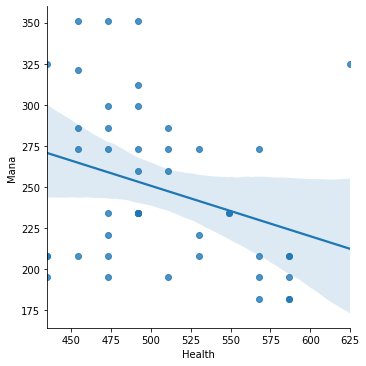

In [27]:
sns.lmplot(x='Health', y='Mana', data=data)

In [28]:
for index,value in data[['AttackSpeed']][0:7].iterrows():
    print(index," : ",value)

0  :  AttackSpeed    0.69
Name: 0, dtype: float64
1  :  AttackSpeed    0.68
Name: 1, dtype: float64
2  :  AttackSpeed    0.66
Name: 2, dtype: float64
3  :  AttackSpeed    1.44
Name: 3, dtype: float64
4  :  AttackSpeed    0.68
Name: 4, dtype: float64
5  :  AttackSpeed    0.71
Name: 5, dtype: float64
6  :  AttackSpeed    0.67
Name: 6, dtype: float64


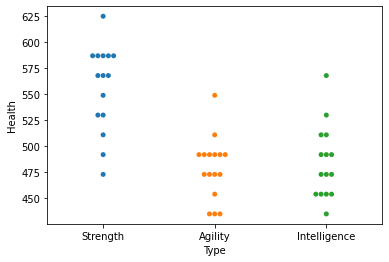

In [29]:
sns.swarmplot(x='Type', y='Health', data=data)

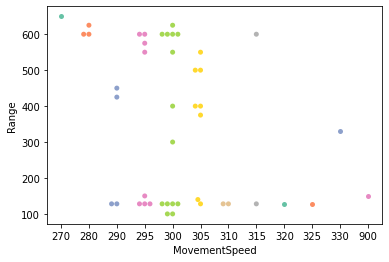

In [30]:
sns.swarmplot(x='MovementSpeed', y='Range', data=data, palette='Set2')

Text(0.5, 1.0, 'Health by Type')

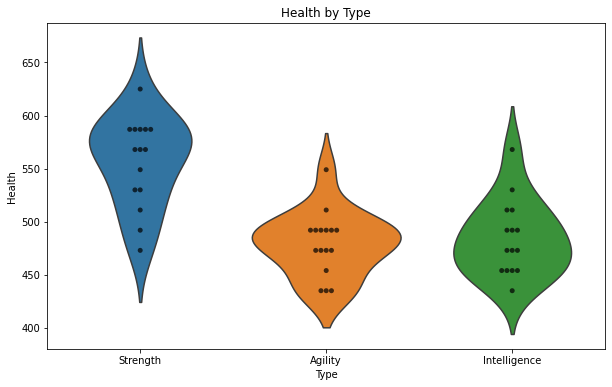

In [31]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Type',y='Health', data=data, inner=None)
sns.swarmplot(x='Type', y='Health', data=data, color='k', alpha=0.7) 
plt.title('Health by Type')

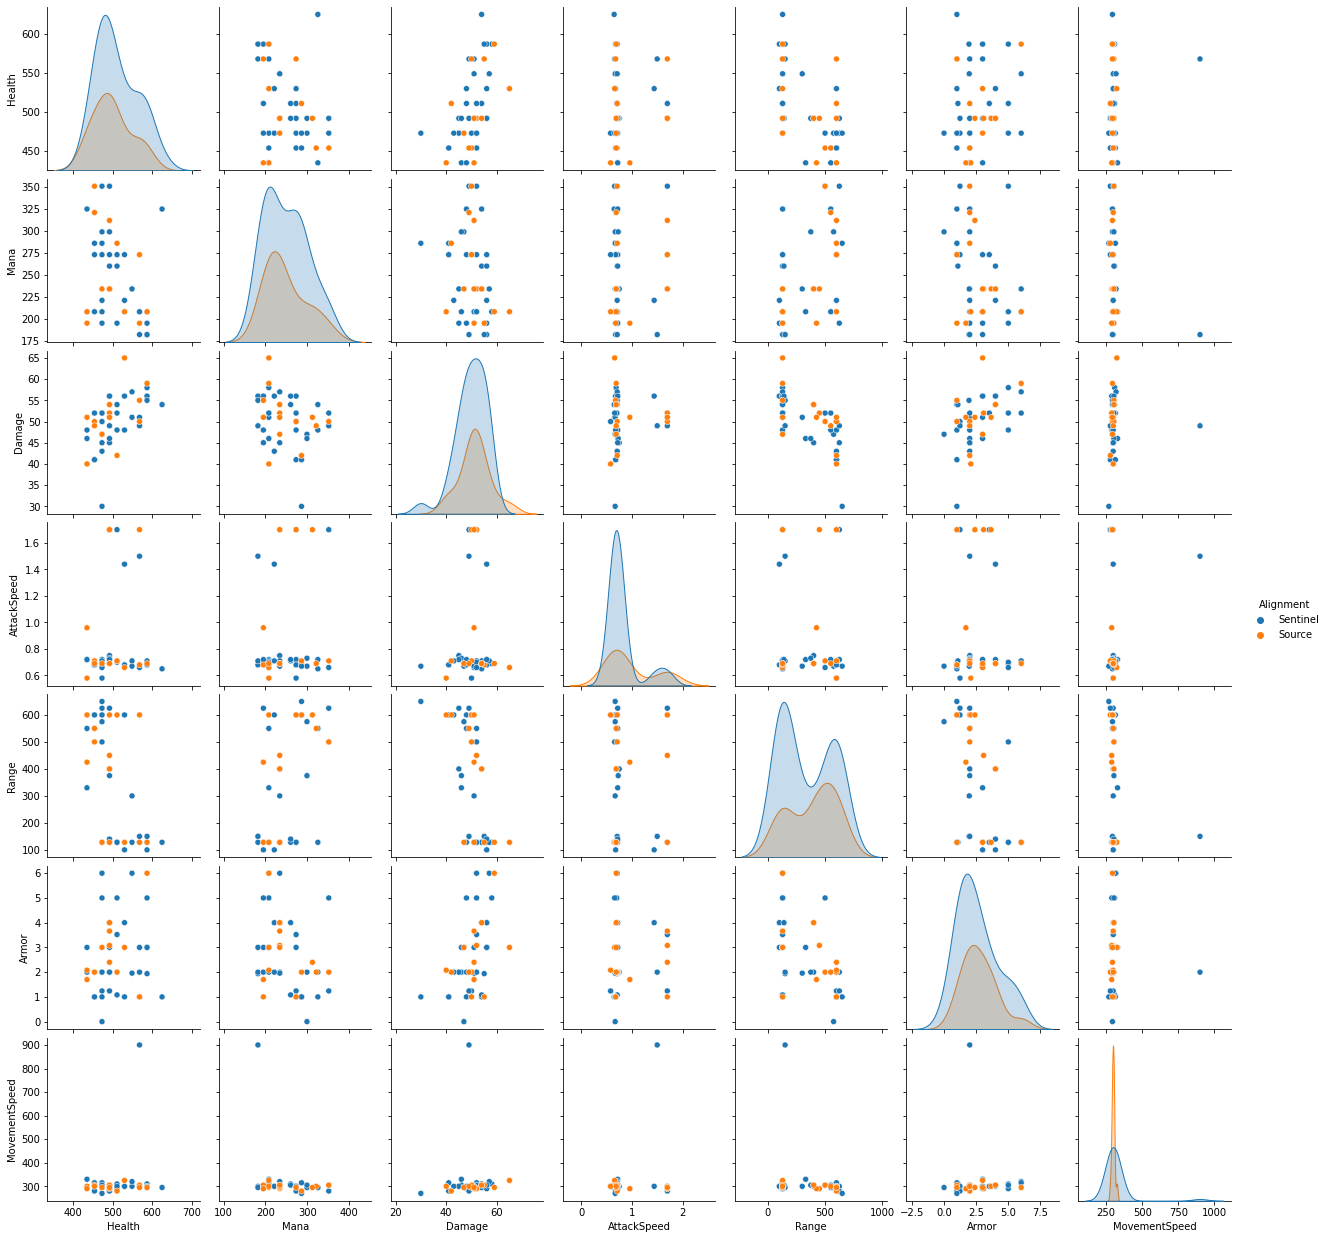

In [32]:
sns.pairplot(data, hue = 'Alignment')

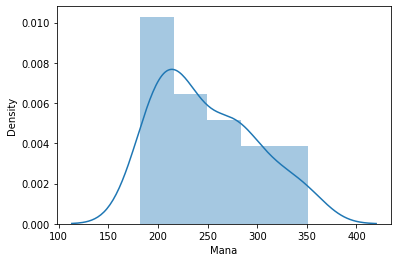

In [33]:
sns.distplot(data.Mana)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

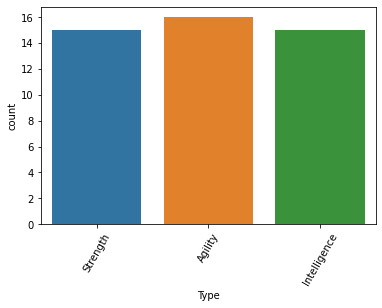

In [34]:
sns.countplot(x='Type', data=data)
plt.xticks(rotation=60)

[Text(0, 0.5, 'Name'),
 Text(0.5, 0, 'Percentage of Name'),
 Text(0.5, 1.0, "Percentage of Name's Population")]

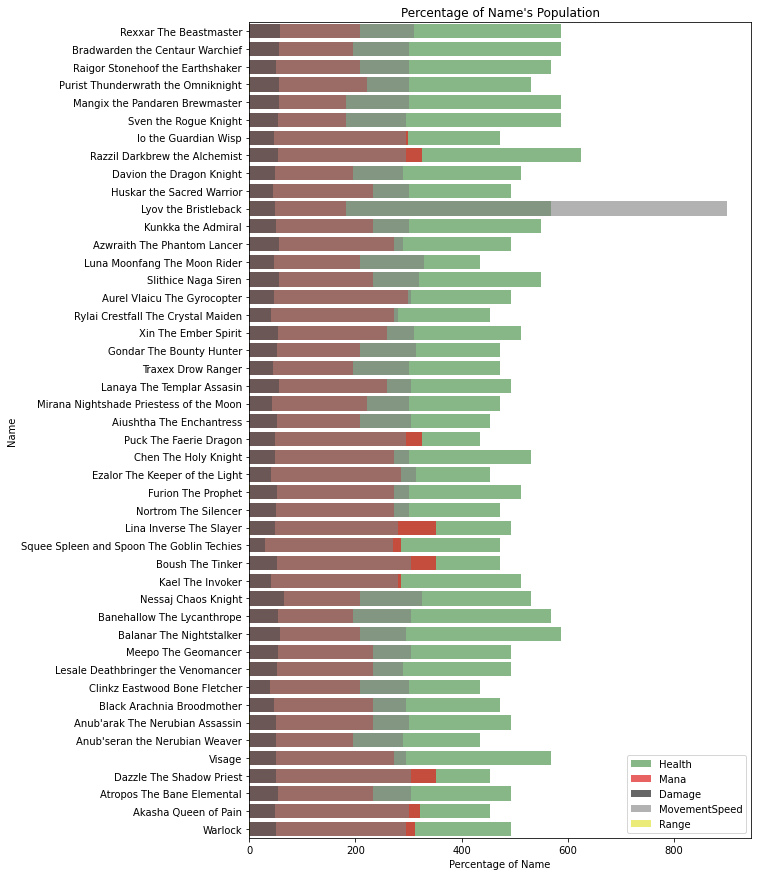

In [35]:
name_list = list(data['Name'].unique())
Health = []
Mana = []
Damage  = []
MovementSpeed = []
Range = []
#Armor = []
#MovementSpeed = []

for i in name_list:
    x = data[data['Name']==i]
    Health.append(sum(x.Health)/len(x))
    Mana.append(sum(x.Mana)/len(x))
    Damage.append(sum(x.Damage)/len(x))
    MovementSpeed.append(sum(x.MovementSpeed)/len(x))
    Range.append(sum(x.AttackSpeed)/len(x))
#    Armor.append(sum(x.Armor) / len(x))
#    MovementSpeed.append(sum(x.MovementSpeed) / len(x))

# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=Health,y=name_list,color='green',alpha = 0.5,label='Health' )
sns.barplot(x=Mana,y=name_list,color='red',alpha = 0.7,label='Mana')
sns.barplot(x=Damage,y=name_list,color='black',alpha = 0.6,label='Damage')
sns.barplot(x=MovementSpeed,y=name_list,color='grey',alpha = 0.6,label='MovementSpeed')
sns.barplot(x=Range,y=name_list,color='yellow',alpha = 0.6,label='Range')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Name', ylabel='Name',title = "Percentage of Name's Population")

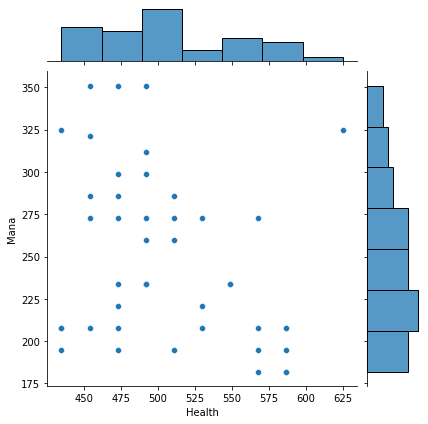

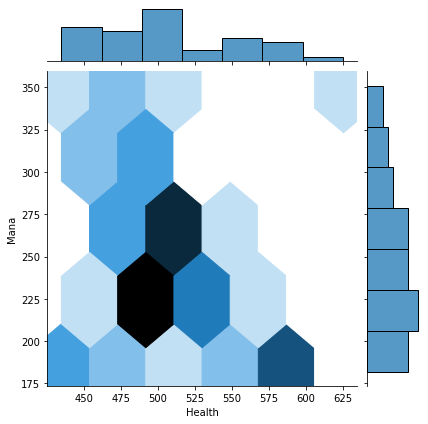

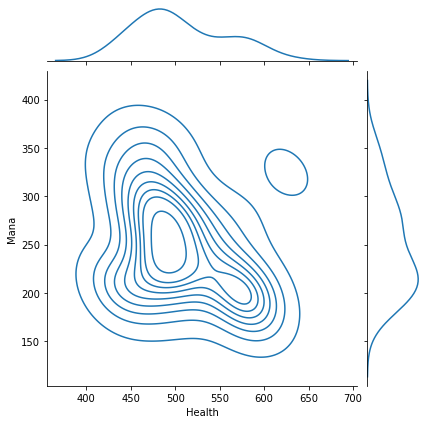

In [36]:
sns.jointplot(x=data["Health"], y=data["Mana"], kind='scatter')
sns.jointplot(x=data["Health"], y=data["Mana"], kind='hex')
sns.jointplot(x=data["Health"], y=data["Mana"], kind='kde')

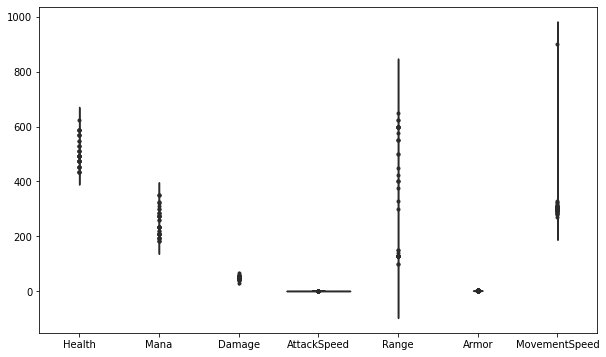

In [37]:
plt.figure(figsize=(10,6))
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

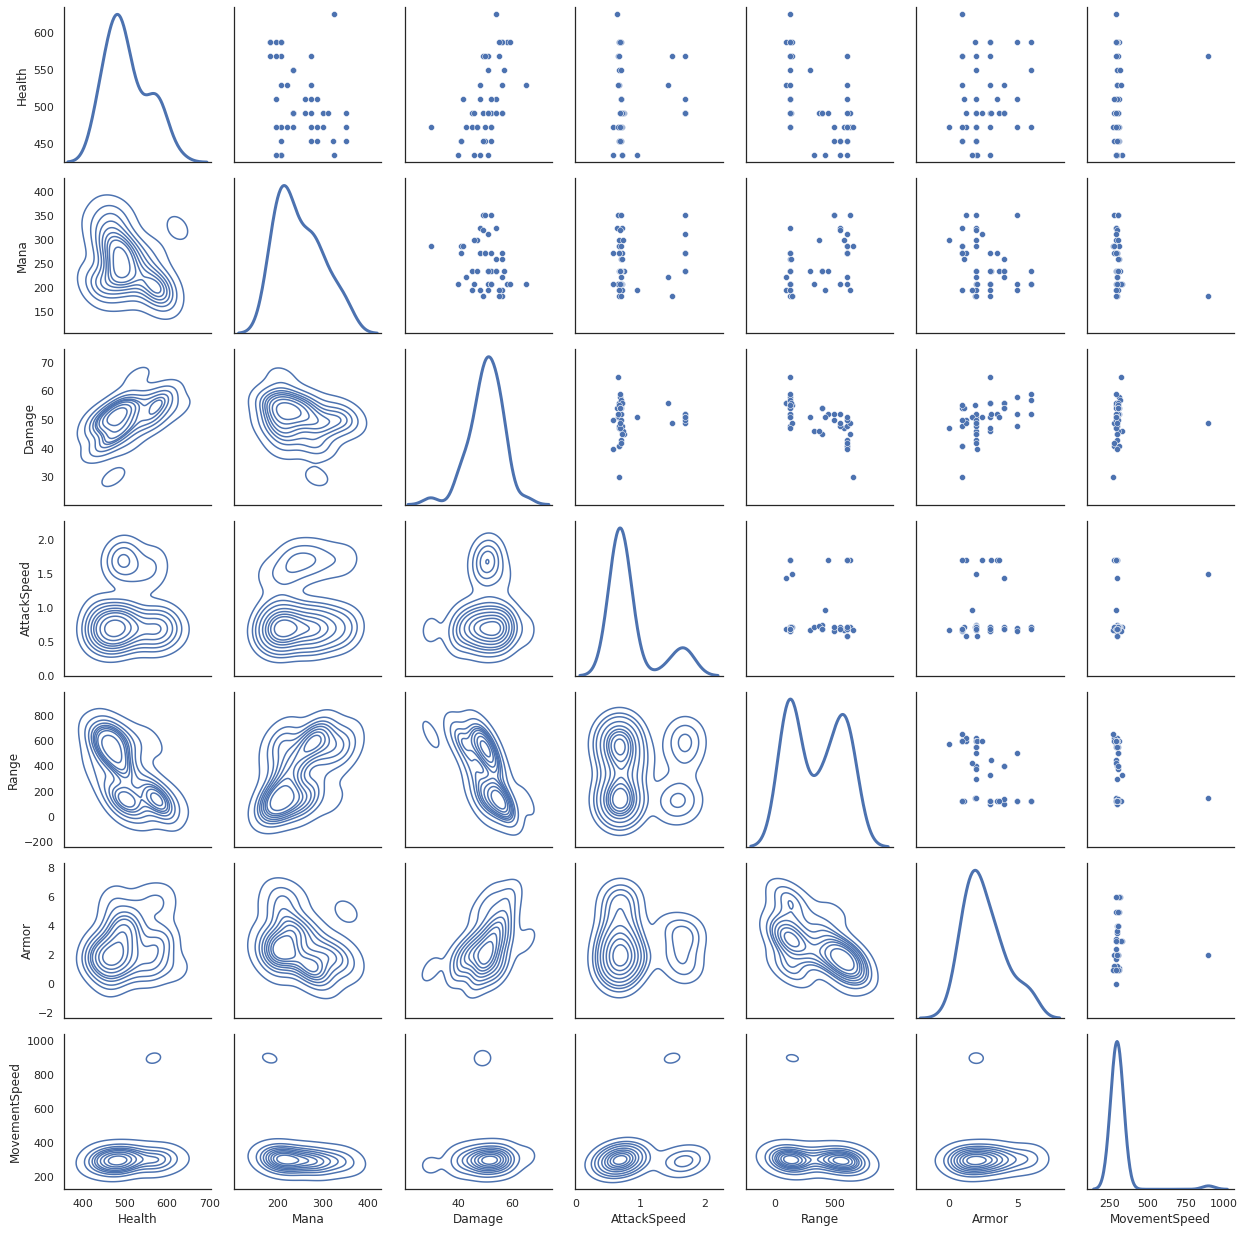

In [38]:
sns.set(style="white")
g = sns.PairGrid(data, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

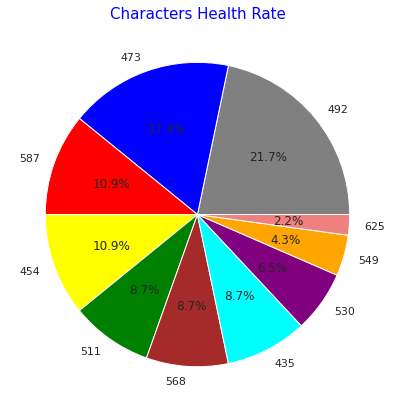

In [39]:
labels = data.Health.value_counts().index
colors = ['grey','blue','red','yellow','green','brown', 'cyan', 'purple', 'orange', 'lightcoral' ]
explode = [0,0,0,0,0,0,0,0,0,0]
sizes = data.Health.value_counts().values

plt.figure(figsize = (7,7))
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Characters Health Rate',color = 'blue',fontsize = 15)
plt.show()

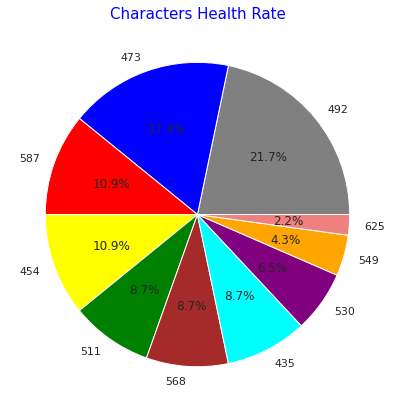

In [40]:
labels = data.Health.value_counts().index
colors = ['grey','blue','red','yellow','green','brown', 'cyan', 'purple', 'orange', 'lightcoral' ]
explode = [0,0,0,0,0,0,0,0,0,0]
sizes = data.Health.value_counts().values

plt.figure(figsize = (7,7))
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Characters Health Rate',color = 'blue',fontsize = 15)
plt.show()

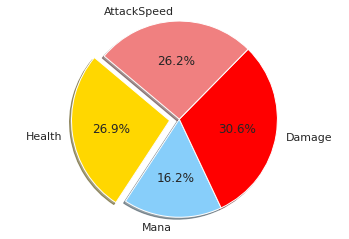

In [41]:
labels = 'Health', 'Mana', 'Damage', 'AttackSpeed'
sizes = [215, 130, 245, 210]
colors = ['gold', 'lightskyblue', 'red', 'lightcoral']
explode = (0.1, 0, 0, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

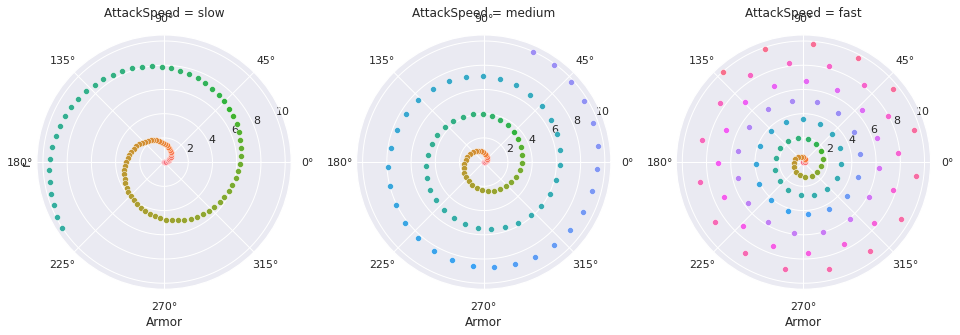

In [42]:
sns.set()

r = np.linspace(0, 10, num=100)
data = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

data = pd.melt(data, id_vars=['r'], var_name='AttackSpeed', value_name='Armor')

g = sns.FacetGrid(data, col="AttackSpeed", hue="Armor", subplot_kws=dict(projection='polar'), height=4.5, sharex=False, sharey=False, despine=False)

g.map(sns.scatterplot, "Armor", "r")